# Laboratorio 1 por Francisco Rodríguez

##  Github: https://github.com/FranciscoRodRam

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.iteso.mx/documents/27014/202031/Logo-ITESO-MinimoV.png" width="300px" height="400px" />




#### En este paso realizaremos la importación de las librerias a utilizar

In [93]:
import funciones as fn                              # Para procesamiento de datos
import visualizaciones as vs                        # Para visualizacion de datos
import pandas as pd                                 # Procesamiento de datos
from datos import OA_Ak                             # Importar token para API de OANDA
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import ta
import scipy.stats as stats
import scipy.optimize as opt
import datetime as dt
from scipy import stats
from matplotlib import pyplot
import statsmodels.api as sm
import seaborn as sns
from seaborn import distplot

### Descargamos los precios históricos a un año con una granularidad de un día

In [156]:
# token de OANDA
OA_In = "SPX500_USD"                  # Instrumento
OA_Gn = "D"                        # Granularidad de velas
fini = pd.to_datetime("2019-02-20 00:00:00").tz_localize('GMT')  # Fecha inicial
ffin = pd.to_datetime("2020-02-20 00:00:00").tz_localize('GMT')  # Fecha final

# Descargar precios masivos
df_pe =  pd.DataFrame(fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn,
                             p3_inst=OA_In, p4_oatk=OA_Ak, p5_ginc=4900))


In [157]:
sentido = (lambda Open, Close: 'ALCISTA' if Close >= Open else 'BAJISTA')

df_pe['Sentido'] = pd.DataFrame(sentido(df_pe['Open'][i], df_pe['Close'][i]) for i in range(len(df_pe['Open'])))

In [158]:
df_pe

,TimeStamp,Open,High,Low,Close,Sentido
0,2019-02-19 21:00:00+00:00,2779.8,2790.2,2772.8,2785.4,ALCISTA
1,2019-02-20 21:00:00+00:00,2785.2,2797.4,2763.8,2775.0,BAJISTA
2,2019-02-21 21:00:00+00:00,2775.0,2793.8,2770.4,2791.8,ALCISTA
3,2019-02-22 21:00:00+00:00,2791.8,2795.0,2789.0,2795.0,ALCISTA
4,2019-02-24 21:00:00+00:00,2799.0,2813.2,2794.2,2796.0,BAJISTA
...,...,...,...,...,...,...
305,2020-02-13 21:00:00+00:00,3376.0,3389.2,3366.2,3380.0,ALCISTA
306,2020-02-14 21:00:00+00:00,3380.2,3383.0,3379.8,3383.0,ALCISTA
307,2020-02-16 21:00:00+00:00,3384.9,3393.8,3384.0,3389.8,ALCISTA
308,2020-02-17 21:00:00+00:00,3378.8,3380.0,3356.4,3371.4,BAJISTA


### Conteo del total del sentido de las velas

In [159]:
df_pe ['Sentido'].value_counts()

ALCISTA    188
BAJISTA    122
Name: Sentido, dtype: int64

### Probabilidad de que las velas sean alcistas o bajistas según lo transcurrido en el día

In [160]:
df_pe ['Sentido'].value_counts()/len(df_pe)

ALCISTA    0.606452
BAJISTA    0.393548
Name: Sentido, dtype: float64

In [161]:
# Conteo de velas consecutivas alcistas/bajistas.
df_pe['Consecutivas'] = (df_pe.groupby(df_pe['Sentido'].ne(df_pe['Sentido'].shift()).cumsum()).cumcount())

In [162]:
df_pe

,TimeStamp,Open,High,Low,Close,Sentido,Consecutivas
0,2019-02-19 21:00:00+00:00,2779.8,2790.2,2772.8,2785.4,ALCISTA,0
1,2019-02-20 21:00:00+00:00,2785.2,2797.4,2763.8,2775.0,BAJISTA,0
2,2019-02-21 21:00:00+00:00,2775.0,2793.8,2770.4,2791.8,ALCISTA,0
3,2019-02-22 21:00:00+00:00,2791.8,2795.0,2789.0,2795.0,ALCISTA,1
4,2019-02-24 21:00:00+00:00,2799.0,2813.2,2794.2,2796.0,BAJISTA,0
...,...,...,...,...,...,...,...
305,2020-02-13 21:00:00+00:00,3376.0,3389.2,3366.2,3380.0,ALCISTA,0
306,2020-02-14 21:00:00+00:00,3380.2,3383.0,3379.8,3383.0,ALCISTA,1
307,2020-02-16 21:00:00+00:00,3384.9,3393.8,3384.0,3389.8,ALCISTA,2
308,2020-02-17 21:00:00+00:00,3378.8,3380.0,3356.4,3371.4,BAJISTA,0


In [163]:
pd.DataFrame(df_pe ['Consecutivas'].value_counts())

,Consecutivas
0,153
1,68
2,44
3,23
4,11
5,5
6,3
9,1
8,1
7,1


In [164]:
b = pd.DataFrame(df_pe['Consecutivas'])

In [165]:
df_pe.info()  #revisar la calidad de nuestros datos para visualizar si tenemos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
TimeStamp       310 non-null datetime64[ns, UTC]
Open            310 non-null object
High            310 non-null object
Low             310 non-null object
Close           310 non-null object
Sentido         310 non-null object
Consecutivas    310 non-null int64
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 17.1+ KB


### Para visualizar el sentido de las  últimas 10 velas 

In [166]:
df_pe[['Sentido']][-10:]

,Sentido
300,BAJISTA
301,ALCISTA
302,ALCISTA
303,ALCISTA
304,BAJISTA
305,ALCISTA
306,ALCISTA
307,ALCISTA
308,BAJISTA
309,ALCISTA


### Promedios móviles del precio de cierre: Valor calculado de manera continua de la media aritmética del precio durante un período de tiempo específico.

In [167]:
df_pe['PM_25'] = df_pe['Close'].rolling(25).mean()
df_pe['PM_50'] = df_pe['Close'].rolling(50).mean()
df_pe['PM_75'] = df_pe['Close'].rolling(75).mean()

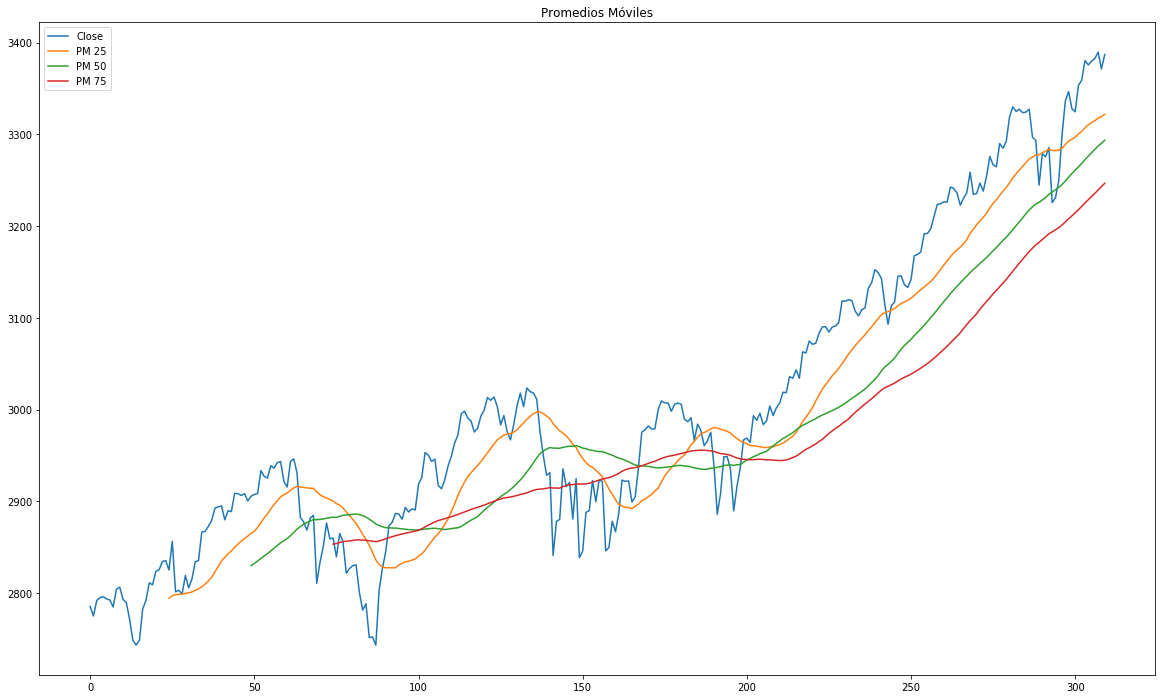

In [168]:
df_pe['Close']=df_pe['Close'].astype(float)
plt.figure(figsize=(20,12))
plt.plot(df_pe[-500:].Close, label = 'Close')
plt.plot(df_pe[-500:].PM_25 , label='PM 25')
plt.plot(df_pe[-500:].PM_50 , label='PM 50')
plt.plot(df_pe[-500:].PM_75 , label='PM 75')
plt.title('Promedios Móviles')
plt.legend()
plt.show()

### Bandas Bollinger 

In [169]:
#Inicializando el indicador de la librería Ta
indicator_bb = ta.volatility.BollingerBands(close=df_pe["Close"], n=20, ndev=2)

# caracterísiticas de las Bandas 
df_pe['bb_bbm'] = indicator_bb.bollinger_mavg()
df_pe['bb_bbh'] = indicator_bb.bollinger_hband()
df_pe['bb_bbl'] = indicator_bb.bollinger_lband()


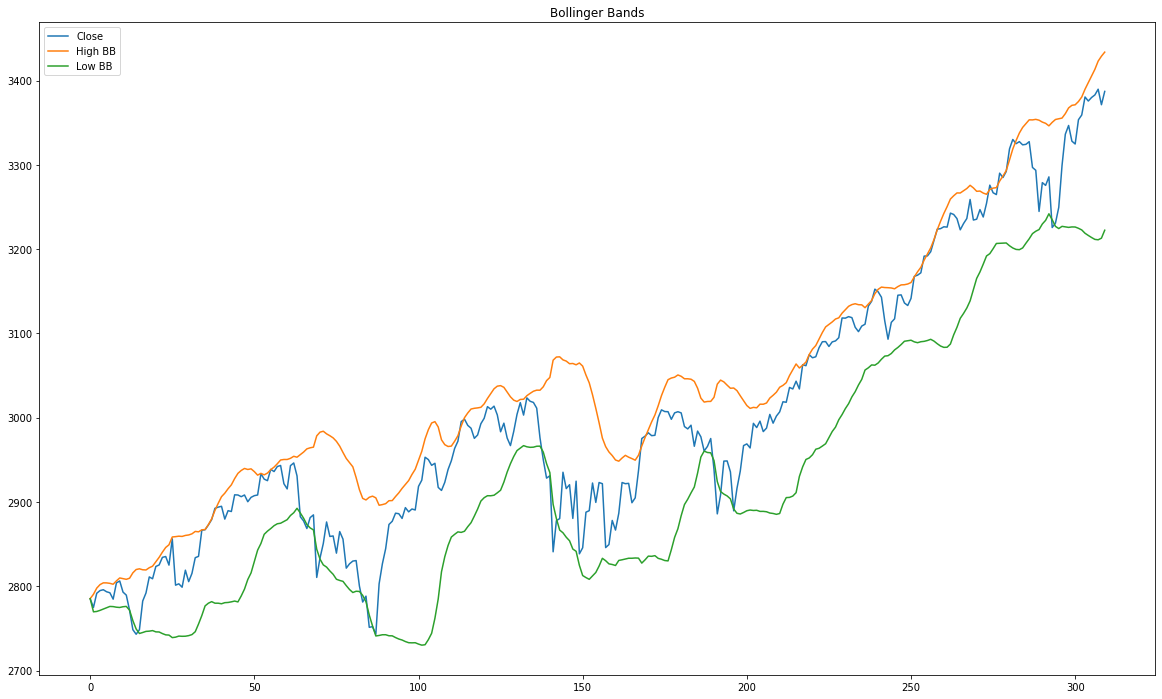

In [170]:
plt.figure(figsize=(20,12))
# Para visualizar 500 valores
plt.plot(df_pe[-500:].Close, label = 'Close')
plt.plot(df_pe[-500:].bb_bbh, label='High BB')
plt.plot(df_pe[-500:].bb_bbl, label='Low BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

## Bandas Bollinger con Media Móvil

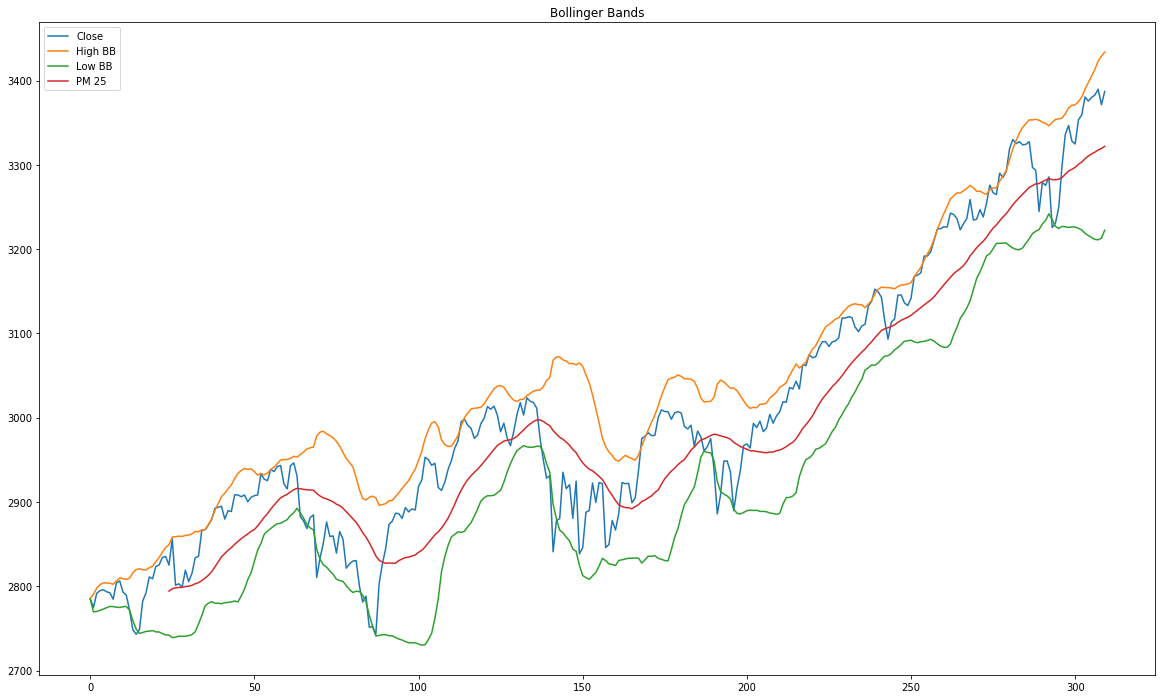

In [171]:
plt.figure(figsize=(20,12))
# Para visualizar 500 valores
plt.plot(df_pe[-500:].Close, label = 'Close') #Serie del precio de cierre
plt.plot(df_pe[-500:].bb_bbh, label='High BB') #Serie Superior de las BB
plt.plot(df_pe[-500:].bb_bbl, label='Low BB') #Serie Inferior de las BB
plt.plot(df_pe[-500:].PM_25 , label='PM 25') #Serie de la Média Móvil
plt.title('Bollinger Bands')
plt.legend()
plt.show()

## Visualizando los últimos 20 valores

In [172]:
df_pe[['Close','PM_25','bb_bbh','bb_bbl','Sentido']][-20:]

,Close,PM_25,bb_bbh,bb_bbl,Sentido
290,3279.0,3280.120,3350.785867,3229.914133,ALCISTA
291,3275.7,3281.932,3349.329219,3234.240781,BAJISTA
292,3285.8,3283.908,3346.333698,3241.996302,ALCISTA
293,3225.7,3282.576,3350.475791,3234.984209,BAJISTA
294,3231.0,3282.432,3353.887148,3227.072852,ALCISTA
295,3249.6,3282.992,3354.736121,3224.483879,ALCISTA
296,3299.4,3285.088,3355.570068,3227.109932,ALCISTA
297,3336.4,3289.016,3360.806370,3226.493630,ALCISTA
298,3346.8,3292.712,3367.604699,3225.875301,ALCISTA
299,3328.2,3294.800,3370.669533,3226.410467,BAJISTA
